In [1]:
import numpy as np
import torch

from dcj_comp import dcj_dist

In [152]:
# version 2.0
# distance between result sequence and the median sequence
for seqlen in [10, 50, 100]:
    print(f'seqlen: {seqlen}')
    print(f'\t lower_bound \t dist_mean \t ratio \t\t std \t\t number')
    for rate in list(range(1, 10)) + [10, 15, 20]:
        rate = rate / 10
        fname = (f'val_seq_g3m_3_' 
                 f'{seqlen}_{int(seqlen * rate)}' 
                 f'_200/raw/g3raw_' 
                 f'{seqlen}_{int(seqlen * rate)}.pt')
        source, target = torch.load(fname)

        lower_bound = np.array([np.ceil(np.sum([dcj_dist(g1, g2)[-1], 
                                       dcj_dist(g1, g3)[-1], 
                                       dcj_dist(g2, g3)[-1]])/2) 
                      for g1, g2, g3 in source])
        
        tmp = torch.load(f'dist_result_pt/{seqlen:0>4}_{rate}.pt')
        # dist_list = np.array([d[-1] for d in tmp])
        # dist_diff = np.abs(dist_list - lower_bound)
        
        dist_diff = np.abs([dcj_dist(a, b[0])[-1] for a, b in zip(target, tmp)])
        
        print(f'{rate} & \t'
              f'{np.mean(lower_bound):>7.4f} &\t' 
              f'{dist_diff.mean():>7.4f} &\t'
              f'{dist_diff.mean()/np.mean(lower_bound) :>7.4f} &\t'
              f'{dist_diff.std():>7.4f} &\t'
             f'{np.sum(dist_diff == 0):>4} &\t \\\\ \hline')
    print('*************')

seqlen: 10
	 lower_bound 	 dist_mean 	 ratio 		 std 		 number
0.1 & 	 3.0000 &	 1.0200 &	 0.3400 &	 1.0998 &	  87 &	 \\ \hline
0.2 & 	 4.1100 &	 2.0350 &	 0.4951 &	 1.4470 &	  33 &	 \\ \hline
0.3 & 	 5.8150 &	 2.7950 &	 0.4807 &	 1.7038 &	  19 &	 \\ \hline
0.4 & 	 6.9300 &	 2.7600 &	 0.3983 &	 1.7270 &	  22 &	 \\ \hline
0.5 & 	 7.0200 &	 3.0500 &	 0.4345 &	 1.7051 &	  17 &	 \\ \hline
0.6 & 	 7.6000 &	 3.3750 &	 0.4441 &	 1.7648 &	  15 &	 \\ \hline
0.7 & 	 7.9400 &	 3.1250 &	 0.3936 &	 1.7057 &	  14 &	 \\ \hline
0.8 & 	 8.7500 &	 3.7050 &	 0.4234 &	 1.6637 &	   4 &	 \\ \hline
0.9 & 	 8.6300 &	 3.9050 &	 0.4525 &	 1.7709 &	   7 &	 \\ \hline
1.0 & 	 8.2200 &	 3.3600 &	 0.4088 &	 1.7721 &	   8 &	 \\ \hline
1.5 & 	 9.1100 &	 3.9650 &	 0.4352 &	 1.6321 &	   5 &	 \\ \hline
2.0 & 	 9.1200 &	 3.6100 &	 0.3958 &	 1.6876 &	   6 &	 \\ \hline
*************
seqlen: 50
	 lower_bound 	 dist_mean 	 ratio 		 std 		 number
0.1 & 	 9.1400 &	 2.7400 &	 0.2998 &	 1.7614 &	  17 &	 \\ \hline
0.2 & 	15.6100 &	

In [26]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [27]:
import matplotlib.pyplot as plt

In [163]:
# for seqlen in [10, 50, 100]:
result = []
seqlen = 10
for rate in list(range(1, 10)) + [10, 15, 20]:
    rate = rate / 10
    fname = (f'val_seq_g3m_3_' 
             f'{seqlen}_{int(seqlen * rate)}' 
             f'_200/raw/g3raw_' 
             f'{seqlen}_{int(seqlen * rate)}.pt')
    source, target = torch.load(fname)

    # lower_bound = np.array([np.ceil(np.sum([dcj_dist(g1, g2)[-1], 
    #                                dcj_dist(g1, g3)[-1], 
    #                                dcj_dist(g2, g3)[-1]])/2) 
    #               for g1, g2, g3 in source])

    tmp = torch.load(f'dist_result_pt/{seqlen:0>4}_{rate}.pt')
    # dist_list = np.array([d[-1] for d in tmp])
    # dist_diff = np.abs(dist_list - lower_bound)

    dist_diff = np.abs([dcj_dist(a, b[0])[-1] for a, b in zip(target, tmp)])

    # tmp = torch.load(f'dist_result_pt/{seqlen:0>4}_{rate}.pt')
    # dist_list = np.array([d[-1] for d in tmp])
    # dist_diff = np.abs(dist_list - lower_bound)
    result.append(dist_diff)

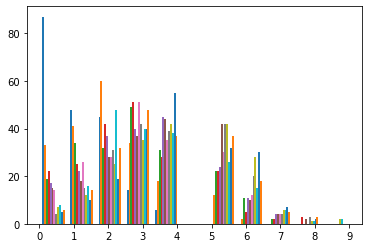

In [164]:
bins = np.arange(np.max(result) + 1)
# x = np.arange(np.max(result) + 1)
plt.figure()
H = plt.hist(result, bins = 11)
plt.xticks(np.arange(np.ceil(np.max(H[1])) + 1))
# plt.xticklabels(x)
plt.savefig('g3val_dist_10.svg', bbox_inches = 'tight')
plt.show()

In [165]:
np.sum(H[0], axis = 1)

array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200.])

In [166]:
# for seqlen in [10, 50, 100]:
result = []
seqlen = 50
for rate in list(range(1, 10)) + [10, 15, 20]:
    rate = rate / 10
    fname = (f'val_seq_g3m_3_' 
             f'{seqlen}_{int(seqlen * rate)}' 
             f'_200/raw/g3raw_' 
             f'{seqlen}_{int(seqlen * rate)}.pt')
    source, target = torch.load(fname)

    tmp = torch.load(f'dist_result_pt/{seqlen:0>4}_{rate}.pt')

    dist_diff = np.abs([dcj_dist(a, b[0])[-1] for a, b in zip(target, tmp)])
    result.append(dist_diff)

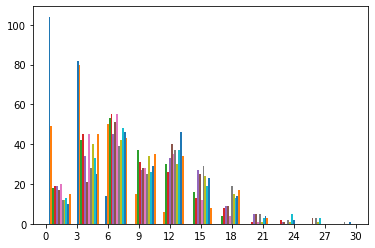

In [167]:
# bins = np.arange(np.max(result) + 1)
# x = np.arange(11)
plt.figure()
H = plt.hist(result, bins = 11)
plt.xticks(np.arange(0, np.ceil(np.max(H[1])) + 1, 3))
# plt.xticklabels(x)
plt.savefig('g3val_dist_50.svg', bbox_inches = 'tight')
plt.show()

In [168]:
np.sum(H[0], axis = 1)

array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200.])

In [169]:
# for seqlen in [10, 50, 100]:
result = []
seqlen = 100
for rate in list(range(1, 10)) + [10, 15, 20]:
    rate = rate / 10
    fname = (f'val_seq_g3m_3_' 
             f'{seqlen}_{int(seqlen * rate)}' 
             f'_200/raw/g3raw_' 
             f'{seqlen}_{int(seqlen * rate)}.pt')
    source, target = torch.load(fname)

    tmp = torch.load(f'dist_result_pt/{seqlen:0>4}_{rate}.pt')

    dist_diff = np.abs([dcj_dist(a, b[0])[-1] for a, b in zip(target, tmp)])
    result.append(dist_diff)

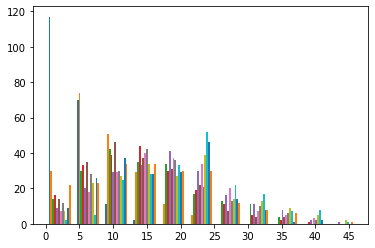

In [170]:
x = np.arange(11)
plt.figure()
H = plt.hist(result, bins = 11)
plt.xticks(np.arange(0, np.ceil(np.max(H[1])) + 1, 5))
# plt.xticklabels(x)
plt.savefig('g3val_dist_100.svg', bbox_inches = 'tight')
plt.show()

In [171]:
np.sum(H[0], axis = 1)

array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200.])

In [22]:
for seqlen in [10, 50, 100]:
    print(f'seqlen: {seqlen}')
    print(f'\t\t lower_bound \t dist_mean \t ratio \t\t std \t\t number')
    for rate in list(range(1, 10)) + [10, 15, 20]:
        rate = rate / 10
        fname = (f'val_seq_g3m_3_' 
                 f'{seqlen}_{int(seqlen * rate)}' 
                 f'_200/raw/g3raw_' 
                 f'{seqlen}_{int(seqlen * rate)}.pt')
        seq = torch.load(fname)[0]

        lower_bound = np.array([np.ceil(np.sum([dcj_dist(g1, g2)[-1], 
                                       dcj_dist(g1, g3)[-1], 
                                       dcj_dist(g2, g3)[-1]])/2) 
                      for g1, g2, g3 in seq])

        tmp = torch.load(f'dist_result_pt/{seqlen:0>4}_{rate}.pt')
        dist_list = np.array([d[-1] for d in tmp])
        dist_diff = np.abs(dist_list - lower_bound)
        print(f'{rate} & \t'
              f'{np.mean(lower_bound):>7.4f} &\t' 
              f'{dist_diff.mean():>7.4f} &\t'
              f'{dist_diff.mean()/np.mean(lower_bound) :>7.4f} &\t'
              f'{dist_diff.std():>7.4f} &\t'
             f'{np.sum(dist_list == lower_bound):>4} &\t \\\\ \hline')
    print('*************')

seqlen: 10
		 lower_bound 	 dist_mean 	 ratio 		 std 		 number
0.1 & 	 3.0000 &	 2.3950 &	 0.7983 &	 2.8388 &	  87 &	 \\ \hline
0.2 & 	 4.1100 &	 4.2150 &	 1.0255 &	 3.4726 &	  33 &	 \\ \hline
0.3 & 	 5.8150 &	 4.9750 &	 0.8555 &	 3.1471 &	  21 &	 \\ \hline
0.4 & 	 6.9300 &	 4.5150 &	 0.6515 &	 3.0149 &	  23 &	 \\ \hline
0.5 & 	 7.0200 &	 4.9800 &	 0.7094 &	 3.0033 &	  19 &	 \\ \hline
0.6 & 	 7.6000 &	 5.0700 &	 0.6671 &	 2.7614 &	  17 &	 \\ \hline
0.7 & 	 7.9400 &	 4.6100 &	 0.5806 &	 2.7455 &	  14 &	 \\ \hline
0.8 & 	 8.7500 &	 5.3400 &	 0.6103 &	 2.6447 &	   4 &	 \\ \hline
0.9 & 	 8.6300 &	 5.5650 &	 0.6448 &	 2.7378 &	   7 &	 \\ \hline
1.0 & 	 8.2200 &	 4.5700 &	 0.5560 &	 2.6335 &	  11 &	 \\ \hline
1.5 & 	 9.1100 &	 5.2900 &	 0.5807 &	 2.6088 &	   6 &	 \\ \hline
2.0 & 	 9.1200 &	 5.2750 &	 0.5784 &	 2.5059 &	   7 &	 \\ \hline
*************
seqlen: 50
		 lower_bound 	 dist_mean 	 ratio 		 std 		 number
0.1 & 	 9.1400 &	 5.9900 &	 0.6554 &	 4.2685 &	  17 &	 \\ \hline
0.2 & 	15.6100 

In [26]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [27]:
import matplotlib.pyplot as plt

In [115]:
# for seqlen in [10, 50, 100]:
result = []
seqlen = 10
for rate in list(range(2, 10)) + [10, 15, 20]:
    rate = rate / 10
    fname = (f'val_seq_g3m_3_' 
             f'{seqlen}_{int(seqlen * rate)}' 
             f'_200/raw/g3raw_' 
             f'{seqlen}_{int(seqlen * rate)}.pt')
    seq = torch.load(fname)[0]

    lower_bound = np.array([np.ceil(np.sum([dcj_dist(g1, g2)[-1], 
                                   dcj_dist(g1, g3)[-1], 
                                   dcj_dist(g2, g3)[-1]])/2) 
                  for g1, g2, g3 in seq])

    tmp = torch.load(f'dist_result_pt/{seqlen:0>4}_{rate}.pt')
    dist_list = np.array([d[-1] for d in tmp])
    dist_diff = np.abs(dist_list - lower_bound)
    result.append(dist_diff)

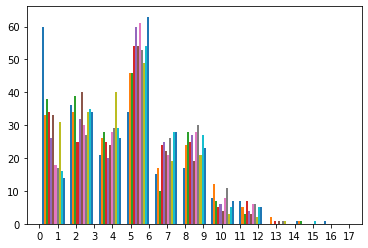

In [116]:
bins = np.arange(np.max(result) + 1)
# x = np.arange(np.max(result) + 1)
plt.figure()
H = plt.hist(result, bins = 11)
plt.xticks(np.arange(np.ceil(np.max(H[1])) + 1))
# plt.xticklabels(x)
plt.savefig('g3val_dist_10.svg', bbox_inches = 'tight')
plt.show()

In [117]:
np.sum(H[0], axis = 1)

array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.])

In [127]:
# for seqlen in [10, 50, 100]:
result = []
seqlen = 50
for rate in list(range(2, 10)) + [10, 15, 20]:
    rate = rate / 10
    fname = (f'val_seq_g3m_3_' 
             f'{seqlen}_{int(seqlen * rate)}' 
             f'_200/raw/g3raw_' 
             f'{seqlen}_{int(seqlen * rate)}.pt')
    seq = torch.load(fname)[0]

    lower_bound = np.array([np.ceil(np.sum([dcj_dist(g1, g2)[-1], 
                                   dcj_dist(g1, g3)[-1], 
                                   dcj_dist(g2, g3)[-1]])/2) 
                  for g1, g2, g3 in seq])

    tmp = torch.load(f'dist_result_pt/{seqlen:0>4}_{rate}.pt')
    dist_list = np.array([d[-1] for d in tmp])
    dist_diff = np.abs(dist_list - lower_bound)
    result.append(dist_diff)

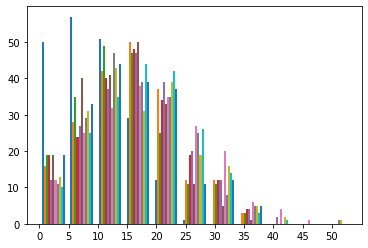

In [128]:
# bins = np.arange(np.max(result) + 1)
# x = np.arange(11)
plt.figure()
H = plt.hist(result, bins = 11)
plt.xticks(np.arange(0, np.ceil(np.max(H[1])) + 1, 5))
# plt.xticklabels(x)
plt.savefig('g3val_dist_50.svg', bbox_inches = 'tight')
plt.show()

In [129]:
np.sum(H[0], axis = 1)

array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.])

In [130]:
# for seqlen in [10, 50, 100]:
result = []
seqlen = 100
for rate in list(range(2, 10)) + [10, 15, 20]:
    rate = rate / 10
    fname = (f'val_seq_g3m_3_' 
             f'{seqlen}_{int(seqlen * rate)}' 
             f'_200/raw/g3raw_' 
             f'{seqlen}_{int(seqlen * rate)}.pt')
    seq = torch.load(fname)[0]

    lower_bound = np.array([np.ceil(np.sum([dcj_dist(g1, g2)[-1], 
                                   dcj_dist(g1, g3)[-1], 
                                   dcj_dist(g2, g3)[-1]])/2) 
                  for g1, g2, g3 in seq])

    tmp = torch.load(f'dist_result_pt/{seqlen:0>4}_{rate}.pt')
    dist_list = np.array([d[-1] for d in tmp])
    dist_diff = np.abs(dist_list - lower_bound)
    result.append(dist_diff)

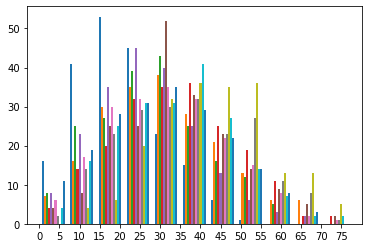

In [131]:
x = np.arange(11)
plt.figure()
H = plt.hist(result, bins = 11)
plt.xticks(np.arange(0, np.ceil(np.max(H[1])) + 1, 5))
# plt.xticklabels(x)
plt.savefig('g3val_dist_100.svg', bbox_inches = 'tight')
plt.show()

In [132]:
np.sum(H[0], axis = 1)

array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.])